# Tele Customer Churn
**by Harsh Vardhan Singh**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

# Load the dataset
file_path = '/mnt/data/Harsh AIML.csv'
data = pd.read_csv(r'D:/Customer Churn Aiml/Harsh AIML.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())
print(data.info())
print(data.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [18]:
# Convert 'TotalCharges' to numeric, coercing errors to handle non-numeric entries
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for any missing values in the dataset after conversion
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


TotalCharges    11
dtype: int64


In [20]:
# Remove rows with missing 'TotalCharges' values
data_cleaned = data.dropna(subset=['TotalCharges'])

# Verify if all missing values are removed
missing_values_after = data_cleaned.isnull().sum()
print(missing_values_after)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [22]:
# Display basic statistics for numerical features
print(data_cleaned.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [24]:
# Display unique values for categorical features
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data_cleaned[col].unique()}")


Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank t

In [26]:
# Compute the correlation matrix
correlation_matrix = data_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
print(correlation_matrix)


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


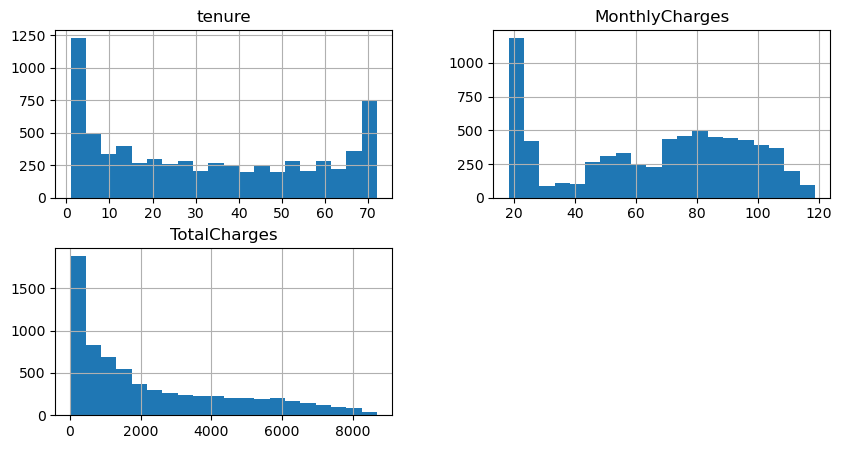

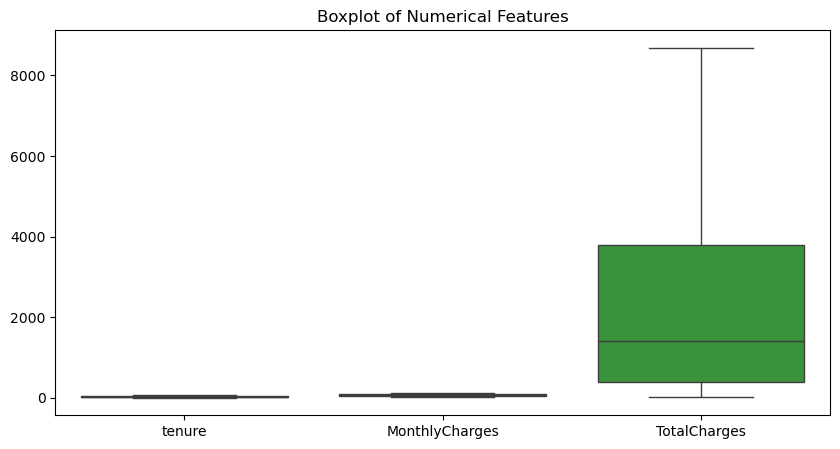

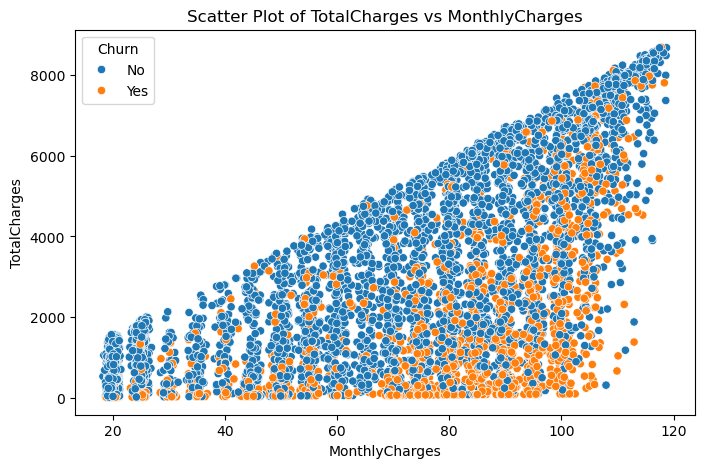

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
data_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(10, 5))
plt.show()

# Boxplot for detecting outliers in numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title('Boxplot of Numerical Features')
plt.show()

# Scatter plot for TotalCharges vs MonthlyCharges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data_cleaned)
plt.title('Scatter Plot of TotalCharges vs MonthlyCharges')
plt.show()


C:\Users\REALME\AppData\Local\Temp\ipykernel_15148\1745942060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data_cleaned, palette='Set2')


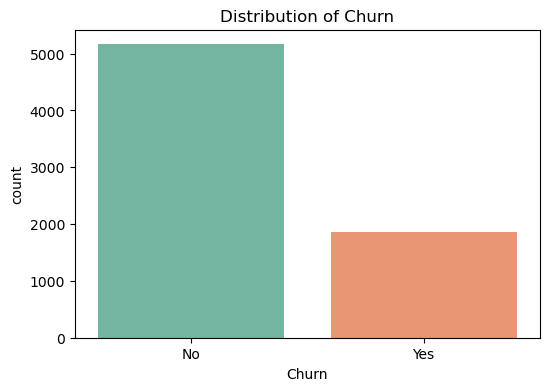

In [34]:
# Count plot for the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data_cleaned, palette='Set2')
plt.title('Distribution of Churn')
plt.show()

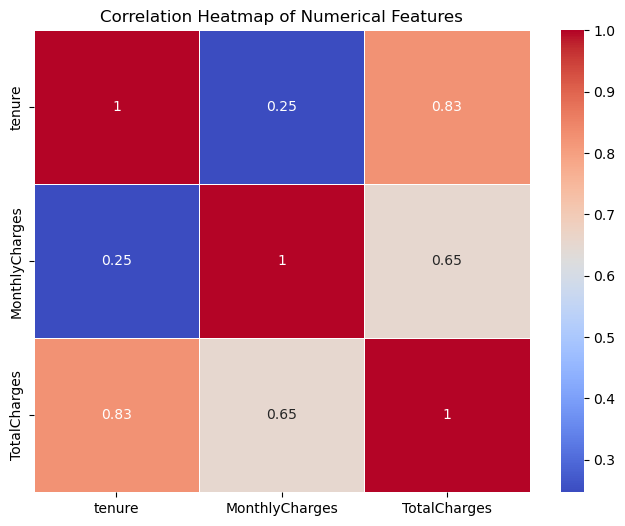

In [36]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
